In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from ex6fun import *

raw_data = loadmat('data/ex6data1.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

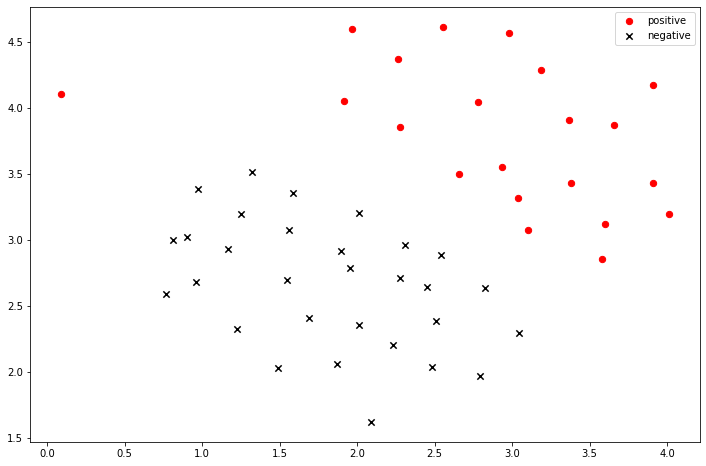

In [5]:
data = pd.DataFrame(raw_data['X'],columns=['x1','x2'])
data['y'] = raw_data['y']

positive = data[data['y'] == 1]
negative = data[data['y'] == 0]

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['x1'],positive['x2'],c = 'r' , s = 40 , label = 'positive',marker = 'o')
ax.scatter(negative['x1'],negative['x2'], c = 'k' ,s = 40 ,label = 'negative' ,marker = 'x')
ax.legend()
plt.show()

In [26]:
from sklearn import svm as scm

In [27]:
svc = scm.LinearSVC(C = 1,loss = 'hinge',max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

In [28]:
svc.fit(data[['x1','x2']],data['y'])
svc.score(data[['x1','x2']],data['y'])

C:\Users\14217\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9803921568627451

In [29]:
svc2 = scm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['x1', 'x2']], data['y'])
svc2.score(data[['x1', 'x2']], data['y'])

C:\Users\14217\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9411764705882353

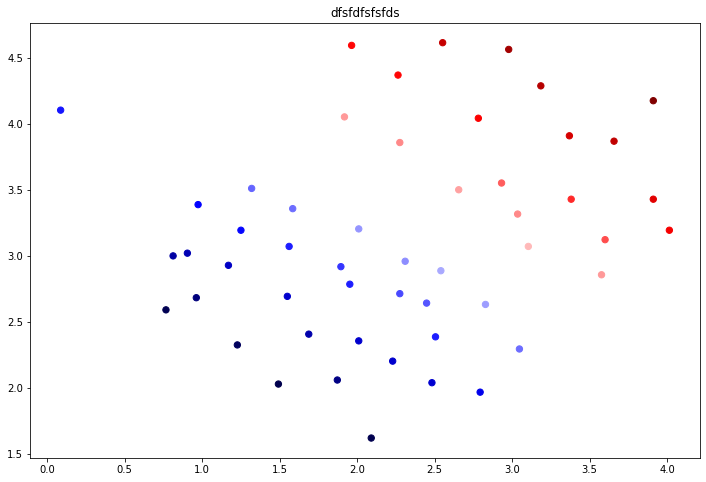

In [37]:
data['svm1 confidence'] = svc.decision_function(data[['x1','x2']])

fig,ax = plt.subplots(figsize = (12,8))

ax.scatter(data['x1'],data['x2'],s = 40 ,c = data['svm1 confidence'],cmap = "seismic")
ax.set_title('dfsfdfsfsfds')
plt.show()

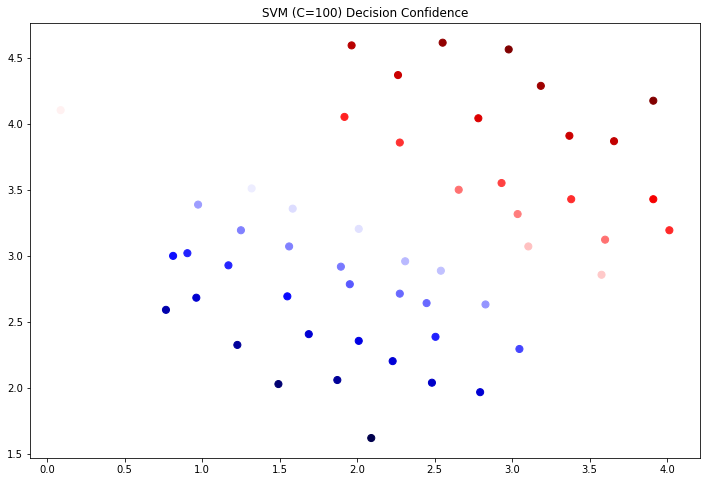

In [40]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['x1', 'x2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['x1'], data['x2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

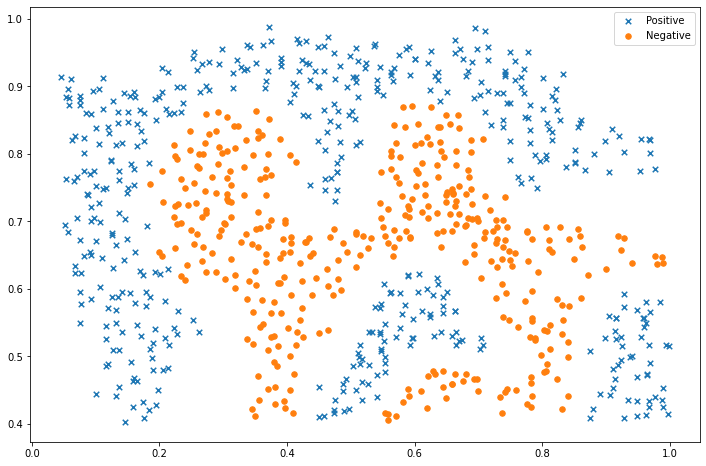

In [41]:
raw_data = loadmat('data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

In [43]:
svc = scm.SVC(C = 100, gamma = 10 ,probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [46]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9698725376593279

In [47]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]
print(data['Probability'])

0      3.000001e-14
1      3.000001e-14
2      3.000001e-14
3      8.030924e-07
4      5.742572e-03
           ...     
858    3.000001e-14
859    3.000001e-14
860    3.000001e-14
861    3.000001e-14
862    3.000001e-14
Name: Probability, Length: 863, dtype: float64


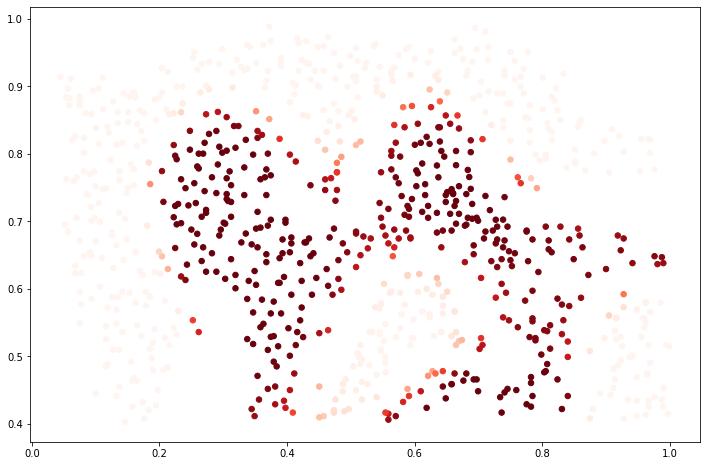

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

In [52]:
raw_data3 = loadmat('data/ex6data3.mat')
x = raw_data3['X']
xval = raw_data3['Xval']
y = raw_data3['y'].ravel()
yval = raw_data3['yval'].ravel()

In [53]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [65]:
best_score = 0
best_params = {'C': None, 'gamma': None}
for c in C_values:
    for gamma in gamma_values:
        svc = scm.SVC(C = c,gamma = gamma)
        svc.fit(x,y)
        score = svc.score(x,y)
        if score > best_score:
            best_score = score
            best_params['C'] = c
            best_params['gamma'] = gamma
best_score,best_params 

(0.995260663507109, {'C': 100, 'gamma': 100})

In [66]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [70]:
x = spam_train['X']
xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

x.shape,y.shape,xtest.shape,ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [74]:
svc = scm.SVC()
svc.fit(x, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(x, y) * 100, 2)))

Training accuracy = 99.32%


In [76]:
print('Test accuracy = {0}%'.format(np.round(svc.score(xtest, ytest) * 100, 2)))

Test accuracy = 98.7%
